In [2]:
 #importing important libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Fruittrain/train'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Fruittrain/test'


In [5]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150),batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size =(150,150), batch_size = 10, class_mode = 'categorical')


Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [6]:
train_dataset.class_indices

{'chomchom': 0,
 'coc': 1,
 'dao': 2,
 'dua': 3,
 'man': 4,
 'mangcut': 5,
 'oi': 6,
 'tao': 7,
 'vusua': 8,
 'xoai': 9}

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [9]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics =['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


10/10 [==============================] - 51s 4s/step - loss: 2.5465 - accuracy: 0.0600 - val_loss: 2.3517 - val_accuracy: 0.1000
Epoch 2/50
10/10 [==============================] - 3s 331ms/step - loss: 2.3350 - accuracy: 0.1000 - val_loss: 2.2801 - val_accuracy: 0.1200
Epoch 3/50
10/10 [==============================] - 3s 328ms/step - loss: 2.2949 - accuracy: 0.1200 - val_loss: 2.2368 - val_accuracy: 0.1700
Epoch 4/50
10/10 [==============================] - 3s 328ms/step - loss: 2.2269 - accuracy: 0.1900 - val_loss: 2.1585 - val_accuracy: 0.1600
Epoch 5/50
10/10 [==============================] - 3s 317ms/step - loss: 2.2024 - accuracy: 0.1900 - val_loss: 2.0881 - val_accuracy: 0.2600
Epoch 6/50
10/10 [==============================] - 3s 331ms/step - loss: 2.0503 - accuracy: 0.1900 - val_loss: 1.8889 - val_accuracy: 0.3200
Epoch 7/50
10/10 [==============================] - 3s 334ms/step - loss: 1.9281 - accuracy: 0.2900 - val_loss: 1.8803 - val_accuracy: 0.3900
Epoch 8/50
10/10 [=

In [11]:
model.save('/content/drive/MyDrive/Fruittrain/Fruittrain.h5')

In [12]:
Fruittrain_model = load_model('/content/drive/MyDrive/Fruittrain/Fruittrain.h5')

In [13]:
score=Fruittrain_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

 7/10 [====================>.........] - ETA: 0s - loss: 0.0202 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


10/10 [==============================] - 2s 142ms/step - loss: 0.0197 - accuracy: 1.0000
Test loss =  0.019669288769364357
Test accuracy =  1.0


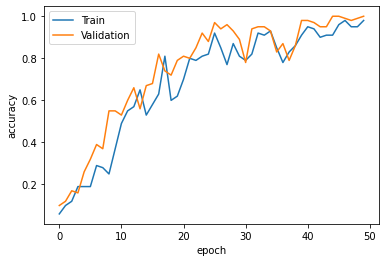

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Object:  chomchom


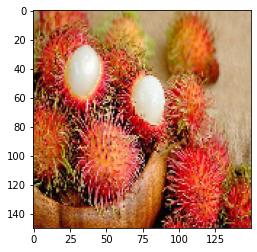

In [15]:
img = load_img('/content/drive/MyDrive/Fruittrain/Predict/1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['chomchom',
 'coc',
 'dao',
 'dua',
 'man',
 'mangcut',
 'oi',
 'tao',
 'vusua',
 'xoai']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])


Object:  coc


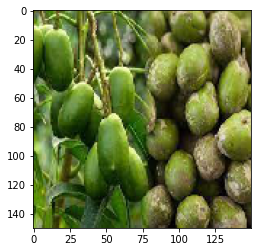

In [16]:
img = load_img('/content/drive/MyDrive/Fruittrain/Predict/2.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['chomchom',
 'coc',
 'dao',
 'dua',
 'man',
 'mangcut',
 'oi',
 'tao',
 'vusua',
 'xoai']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])

Object:  man


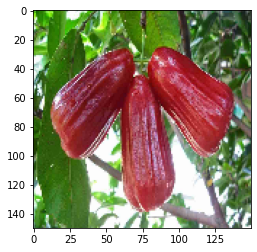

In [17]:
img = load_img('/content/drive/MyDrive/Fruittrain/Predict/5.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['chomchom',
 'coc',
 'dao',
 'dua',
 'man',
 'mangcut',
 'oi',
 'tao',
 'vusua',
 'xoai']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])

Object:  xoai


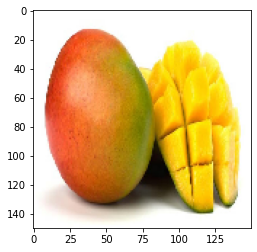

In [18]:
img = load_img('/content/drive/MyDrive/Fruittrain/Predict/8.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['chomchom',
 'coc',
 'dao',
 'dua',
 'man',
 'mangcut',
 'oi',
 'tao',
 'vusua',
 'xoai']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])

In [19]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Fruittrain.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-24 17:27:48--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-24 17:27:49 (37.1 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Fruittrain.ipynb to pdf
[NbConvertApp] Support files will be in Fruittrain_files/
[NbConvertApp] Making directory ./Fruittrain_files
[NbConvertApp] Writing 47565 bytes to ./note

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'